# Stat 535 HW4
Dongyang Wang

In [58]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

### Problem 2

#### a
From Problem 1, we know $\frac{d\hat{L}_{logit}}{dw_i} = -(1 - \phi(w^Tx))yx_i$ and $\frac{d\hat{L}_{logit}}{dx_i} = -(1 - \phi(w^Tx))yw_i$. From lecture we know the derivative of $\phi(w^Tx)$ is $(y-\mu)x_i$ Therefore, taking derivative wrt $w_i$ and $x_i$ respectively, we have $\frac{d\hat{L}_{logit}}{dw_i dw_i} = (y-\mu)x_i^2y$, $\frac{d\hat{L}_{logit}}{dw_i dx_i} = \frac{d\hat{L}_{logit}}{dx_i dw_i} = -y + \phi(w^Tx) y + (y-\mu)x_i w_i$, $\frac{d\hat{L}_{logit}}{dx_i dx_i} = (y-\mu)yw_i^2$. Therefore, the above four quantities comprise the Hessian.

#### c
Since there is at least one 0 eigenvalue, then for some point x, $f''(x) = 0$ where $f(x) = \hat{L}_{logit}$. By definition of strongly convexity, f strongly convex if and only if ${\displaystyle f''(x)\geq m>0}$ for all $x$. Therefore, the Hessian of $\hat{L}_{logit}$ is not strongly convex.

### Problem 3

#### a

$\hat{\beta} = \begin{bmatrix} \hat{\beta_0} \\ \hat{\beta_1} \end{bmatrix} = (X^TX + \lambda I_n)^{-1}X^TY$


#### b



In [6]:
import requests

response = requests.get('https://sites.stat.washington.edu/mmp/courses/535/fall22/assignments/hw4-rr.dat')
hw4_rr = response.text

data_by_line = hw4_rr.split('\n')
data_by_line = data_by_line[:len(data_by_line)-1]

for i in range(0,len(data_by_line)):
    data_by_line[i] = ' '.join(data_by_line[i].split())
    data_by_line[i] = data_by_line[i].split(' ')

hw4_rr = [0] * len(data_by_line)
    
for i in range(len(data_by_line)):
    hw4_rr[i] = [float(j) for j in data_by_line[i]]

rr_data = pd.DataFrame(hw4_rr, columns =['x', 'f(x)'])

In [7]:
rr_data

,x,f(x)
0,0.274982,1.282543
1,0.551380,1.581783
2,0.108140,1.109309
3,0.624868,1.663914
4,0.579155,1.612697
...,...,...
95,0.432440,1.451140
96,0.610666,1.647957
97,0.078436,1.079051
98,0.289446,1.297824


In [8]:
X = []
Y = []
for i in range(len(rr_data)):
    temp = [1,rr_data['x'][i]]
    X.append(temp)
    Y.append( [rr_data['f(x)'][i]] )
X = np.matrix(X)
Y = np.matrix(Y)

In [9]:
def beta(lmd, X, Y):
    XT = X.transpose()
    XTX = np.matmul(XT, X)
    identity = np.identity(2) * lmd
    inv = np.linalg.inv(XTX + identity)
    res1 = np.matmul(inv, XT)
    return np.matmul(res1, Y).transpose()

def calculate_L(lmd, X, Y):
    b = beta(lmd, X, Y)
    bT = b.transpose()
    XbT = np.matmul(X,bT)
    res = np.subtract(Y, XbT)
    res = np.square(res)
    return res.sum()
        
def calculate_J(lmd, X, Y):
    b = beta(lmd, X, Y)
    L = calculate_L(lmd, X, Y)
    extra = lmd * math.sqrt((b[0,1])**2 + (b[0,0])**2)
    return L + extra

def ridge_result(lmd, X, Y):
    b0 = beta(lmd, X, Y)[0,0]
    b1 = beta(lmd, X, Y)[0,1]
    L = calculate_L(lmd, X, Y)
    J = calculate_J(lmd, X, Y)
    res = [lmd, b0, b1, L, J]
    return res

In [10]:
lmds = list(np.arange(0,len(rr_data)+1,0.1))

results = []
for lmd in lmds:
    res = ridge_result(lmd, X, Y)
    results.append(res)

results = pd.DataFrame(results, columns =['lmd', 'b0', 'b1', 'L', 'J'])

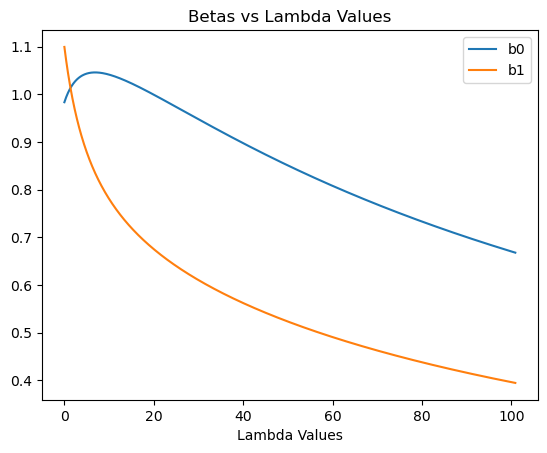

In [11]:
plt.plot(results['lmd'],results['b0'], label = "b0")
plt.plot(results['lmd'],results['b1'], label = "b1")

plt.title("Betas vs Lambda Values")
plt.xlabel("Lambda Values")
plt.legend()
plt.show()

#### c

As shown in the following graph, we can observe that the beta values tend to get smaller and smaller as lambda increases except in the first several cases. The losses are getting largers as lambda gets larger. This reveals that OLS (lambda = 0) has the best accuracy on the training set of data. A larger lambda is assocaited with more bias but less variance.

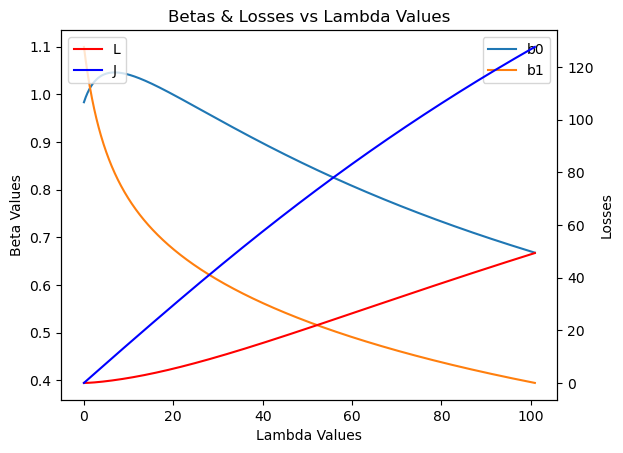

In [12]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Lambda Values')
ax1.set_ylabel('Beta Values')
ax1.plot(results['lmd'],results['b0'], label = "b0")
ax1.plot(results['lmd'],results['b1'], label = "b1")

ax2 = ax1.twinx()

ax2.set_ylabel('Losses')
ax2.plot(results['lmd'],results['L'], label = "L", color = 'red')
ax2.plot(results['lmd'],results['J'], label = "J", color = 'blue')

plt.title("Betas & Losses vs Lambda Values")
ax1.legend()
ax2.legend()
plt.show()

### Problem 4

#### a

In [59]:
import requests

response = requests.get('https://sites.stat.washington.edu/mmp/courses/535/fall22/assignments/hw4-nn-train-100.dat')
hw4_nn = response.text

data_by_line = hw4_nn.split('\n')
data_by_line = data_by_line[:len(data_by_line)-1]

for i in range(0,len(data_by_line)):
    data_by_line[i] = ' '.join(data_by_line[i].split())
    data_by_line[i] = data_by_line[i].split(' ')

hw4_nn = [0] * len(data_by_line)
    
for i in range(len(data_by_line)):
    hw4_nn[i] = [float(j) for j in data_by_line[i]]

nn_train = pd.DataFrame(hw4_nn, columns =['x1', 'x2', 'y'])

In [60]:
import requests

response = requests.get('https://sites.stat.washington.edu/mmp/courses/535/fall22/assignments/hw4-nn-test.dat')
hw4_nn = response.text

data_by_line = hw4_nn.split('\n')
data_by_line = data_by_line[:len(data_by_line)-1]

for i in range(0,len(data_by_line)):
    data_by_line[i] = ' '.join(data_by_line[i].split())
    data_by_line[i] = data_by_line[i].split(' ')

hw4_nn = [0] * len(data_by_line)
    
for i in range(len(data_by_line)):
    hw4_nn[i] = [float(j) for j in data_by_line[i]]

nn_test = pd.DataFrame(hw4_nn, columns =['x1', 'x2', 'y'])

In [61]:
nn_train

,x1,x2,y
0,0.436,0.540,-1.0
1,0.114,0.075,1.0
2,0.496,0.354,-1.0
3,0.834,0.397,-1.0
4,0.231,0.168,1.0
...,...,...,...
95,0.398,0.621,-1.0
96,0.578,0.917,1.0
97,0.793,0.909,1.0
98,0.002,0.404,1.0


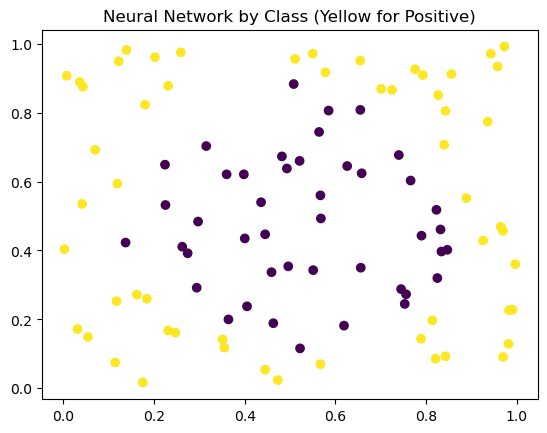

In [62]:
plt.scatter(nn_train['x1'], nn_train['x2'], c = nn_train['y'])

plt.title("Neural Network by Class (Yellow for Positive)")
plt.show()

### b

No, it is impossible to do that because the decision boundary is irregular and we need way more than 2 units to perfectly seperate the +1 and -1 cases. So we will need more than 2 units in the layer to get perfect classification where $\hat{L}_{01} = 0$.

### c

I have chosen the initial points from a uniform distribution with a small interval, namely [-0.5,0.5]. This way, I randomly generate my initial points and not to get too extreme values for the sigmoid functions.

Note that I have ignored the tolerance becuase the change in the beta and w values are very small.

In [73]:
X = []
Y = []
#if nn_train['y'][i] == 1:
#        Y.append([nn_train['y'][i]])
#    else:
#        Y.append([0])
for i in range(len(nn_train)):
    Y.append([nn_train['y'][i]])
    X.append([1, nn_train['x1'][i], nn_train['x2'][i]])

Y = np.matrix(Y)
X = np.matrix(X)

X_test = []
Y_test = []
for i in range(len(nn_test)):
    Y_test.append([nn_test['y'][i]])
    X_test.append([1, nn_test['x1'][i], nn_test['x2'][i]])
Y_test = np.matrix(Y_test)
X_test = np.matrix(X_test)

In [133]:
def get_gradient_beta(y, yhat):
    sub = np.subtract(y, yhat)
    return sub.mean()

def get_gradient_w(y, yhat, x):
    y_yhat = np.subtract(y, yhat)
    res = np.matmul(y_yhat, x)
    return res.mean()

def prediction(b, w, x, b0):
    xt = x.transpose()
    wxt = np.matmul(w, xt)
    z = 1/(1+np.exp(wxt))
    bt = b.transpose()
    val = np.matmul(bt, z)[0,0]+b0
    return  1/(1+np.exp(val))

#def get_logit(y, w, x):
#    exponent = -1 * y[0,0] * prediction(b, w, x, b0)
#    return np.log(1 + np.exp(exponent))

def get_logit_one_w(y, wi, x):
    xt = x.transpose()
    wxt = np.matmul(wi, xt)[0,0]
    exponent = -1*(y[0,0]*wxt)
    return np.log(1 + np.exp(exponent))

def get_logit(y, w, x):
    logit = 0
    for wi in w:
        logit += abs(get_logit_one_w(y, wi, x))
    return logit

In [188]:
def gradient_descent_one(b, w, X, b0, Y):
    
    gradient_sum_b = 0
    gradient_sum_w = 0
    
    logit = 0
    b_s = []
    w_s = []
    
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        
        yhat = np.matrix(prediction(b, w, x, b0))
        gradient_b = get_gradient_beta(y, yhat)
        gradient_w = get_gradient_w(y, yhat, x)
        
        gradient_sum_b += gradient_b
        gradient_sum_w += gradient_w
        
        logit += get_logit(y, w, x)
        
    gradient_sum_b = gradient_sum_b/len(X)
    gradient_sum_w = gradient_sum_w/len(X)
    
    return [logit/100, gradient_sum_b/len(X), gradient_sum_w/len(X)]

def gradient_descent(b, w, X, b0, Y, iter = 100, rate = 0.00001 ):
    
    previous_logit = None
    current_logit = 0
    w_cur = w
    b_cur = b    
    
    b_s = []
    w_s = []
    
    i = 1
    while i < iter:
        
        b_s.append(b_cur)
        w_s.append(w_cur)
        
        #print(current_logit)
        
        res = gradient_descent_one(b_cur, w_cur, X, b0, Y)
        current_logit = res[0]
        
        #if previous_logit and 1- current_logit/previous_logit <= tol:
        #    break
        
        previous_logit = current_logit
        #print(current_logit/previous_logit)
        
        b_cur = b_cur - rate*res[1]
        w_cur = w_cur - rate*res[2]
        
        i += 1
    
    return [current_logit, b_cur, w_cur]

In [189]:
m = 10
tol = 10**(-4)
b0 = -0.1
np.random.seed(42)
w = np.matrix(np.random.uniform(-0.5,0.5,30)).reshape([10,3])
b = np.matrix(np.random.uniform(-0.5,0.5,10)).reshape([10,1])

In [190]:
res = gradient_descent(b, w, X, b0, Y, iter = 10000)

### d

The implementation details are as follows:

I selected m = 10 hidden units so the model is easier to train. I chose the learning rate to be 0.00001 so the change can be small enough such that I can update by a minimal amount so not to miss any possible optimum in the course of the descent. The number of iteration is 10000, so it's not large enough to waste too much time and not too small that we might miss an optimum. The algorithm now does not converge. 

The final value of loss function $\hat{L}_{Logit}$ is 7.1228216353302605.

The final value of loss function $\hat{L}_{01}$ is 0.51

The time the algorithm takes is 30 seconds. (for 10000 iterations)

In [191]:
res

[7.1228216353302605,
 matrix([[ 0.10796295],
         [-0.32905778],
         [-0.43453031],
         [ 0.44930363],
         [ 0.46605013],
         [ 0.30881544],
         [-0.19496814],
         [-0.40190979],
         [ 0.18465112],
         [-0.05942941]]),
 matrix([[-0.12518387,  0.45099032,  0.23226996],
         [ 0.0989345 , -0.34370534, -0.34372946],
         [-0.44164037,  0.36645216,  0.10139103],
         [ 0.20834859, -0.47913949,  0.47018587],
         [ 0.33271866, -0.28738487, -0.31789902],
         [-0.31631948, -0.19548174,  0.02503245],
         [-0.06777897, -0.20849485,  0.11212891],
         [-0.36023012, -0.20757934, -0.13336214],
         [-0.043654  ,  0.28545198, -0.3000502 ],
         [ 0.01451045,  0.09269058, -0.45327357]])]

In [192]:
train_pred = []
for i in X:
    train_pred.append(prediction(res[1], res[2], i, b0))
num = Y[Y>0].shape[1]
thres = sorted(train_pred)[num-1]
for i in range(len(train_pred)):
    if train_pred[i] >= thres:
        train_pred[i]= 1
    else:
        train_pred[i] = -1

In [193]:
sum(nn_train['y'] != train_pred)/100

0.51

### e

The final value of loss function $\hat{L}_{Logit}$ is 6.388056543249376.

The final value of loss function $\hat{L}_{01}$ is 0.493.

I know this model is a failure but I tried.

In [178]:
test_pred = []
for i in X_test:
    test_pred.append(prediction(res[1], res[2], i, b0))
num = Y_test[Y_test>0].shape[1]
thres = sorted(test_pred)[num-1]
for i in range(len(test_pred)):
    if test_pred[i] >= thres:
        test_pred[i]= 1
    else:
        test_pred[i] = -1

In [184]:
sum(nn_test['y'] != test_pred)/1000

0.493

In [186]:
get_logit(Y_test, res[2], X_test)

6.388056543249376

### f

In [217]:
#iterations = np.linspace(0,5000,11)
#for i in iterations:
#    res = gradient_descent(b, w, X, b0, Y, iter = i)
#    ress.append(res)

In [213]:
k = [100, 500, 1000, 5000, 10000]

In [208]:
def get_train(X, Y, res):
    train_pred = []
    for i in X:
        train_pred.append(prediction(res[1], res[2], i, b0))
    num = Y[Y>0].shape[1]
    thres = sorted(train_pred)[num-1]
    for i in range(len(train_pred)):
        if train_pred[i] >= thres:
            train_pred[i]= 1
        else:
            train_pred[i] = -1
    return train_pred

In [207]:
res1 = gradient_descent(b, w, X, b0, Y, iter = 100)
res2 = gradient_descent(b, w, X, b0, Y, iter = 500)
res3 = gradient_descent(b, w, X, b0, Y, iter = 1000)
res4 = gradient_descent(b, w, X, b0, Y, iter = 5000)
res5 = gradient_descent(b, w, X, b0, Y, iter = 10000)

In [211]:
pred1 = get_train(X, Y, res1)
pred2 = get_train(X, Y, res2)
pred3 = get_train(X, Y, res3)
pred4 = get_train(X, Y, res4)
pred5 = get_train(X, Y, res5)

pred11 = get_train(X_test, Y_test, res1)
pred22 = get_train(X_test, Y_test, res2)
pred33 = get_train(X_test, Y_test, res3)
pred44 = get_train(X_test, Y_test, res4)
pred55 = get_train(X_test, Y_test, res5)

In [215]:
llogit = [res1[0], res2[0],res3[0],res4[0],res5[0]]
l01 = [sum(nn_train['y'] != pred1)/100, sum(nn_train['y'] != pred2)/100, 
          sum(nn_train['y'] != pred3)/100, sum(nn_train['y'] != pred4)/100,
          sum(nn_train['y'] != pred5)/100]

llogit_test = [get_logit(Y_test, res1[2], X_test), get_logit(Y_test, res2[2], X_test),
      get_logit(Y_test, res3[2], X_test),get_logit(Y_test, res4[2], X_test),
      get_logit(Y_test, res5[2], X_test)]

l01_test= [sum(nn_test['y'] != pred11)/1000, sum(nn_test['y'] != pred22)/1000, 
          sum(nn_test['y'] != pred33)/1000, sum(nn_test['y'] != pred44)/1000,
          sum(nn_test['y'] != pred55)/1000]

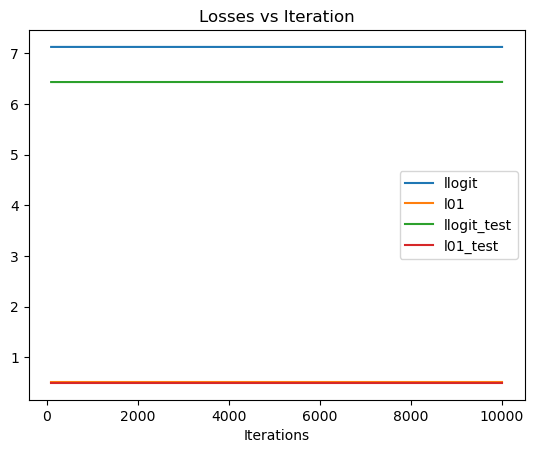

In [216]:
plt.plot(k, llogit, label = "llogit")
plt.plot(k, l01, label = "l01")
plt.plot(k, llogit_test, label = "llogit_test")
plt.plot(k, l01_test, label = "l01_test")

plt.title("Losses vs Iteration")
plt.xlabel("Iterations")
plt.legend()
plt.show()

### g